/home/ray/anaconda3/envs/python2/lib/python2.7/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


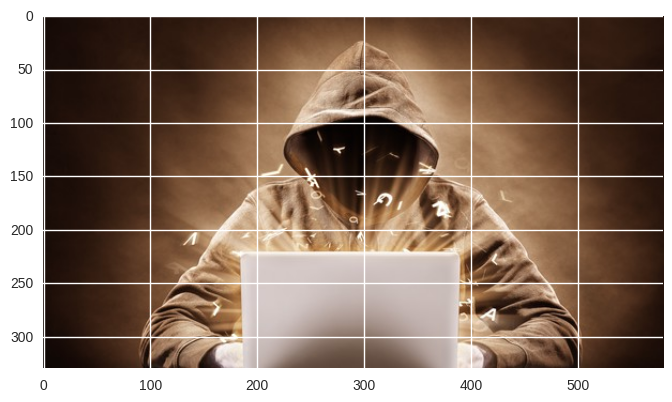

In [1]:
%matplotlib inline
import numpy as np
import cv2
from matplotlib import pyplot as plt
from scipy.fftpack import dct,idct
import seaborn as sea
img = cv2.imread('hacker.jpg')
plt.imshow(img)
plt.show()

## Implemented DCT & IDCT for 2D using python functions

In [2]:
from scipy.fftpack import dct
def DCT_2d(M):
    return dct(dct(M.T, norm='ortho').T,norm='ortho')

In [3]:
from scipy.fftpack import idct
def IDCT_2d(M):
    return idct(idct(M, norm='ortho').T, norm='ortho').T

## Proving the correctness

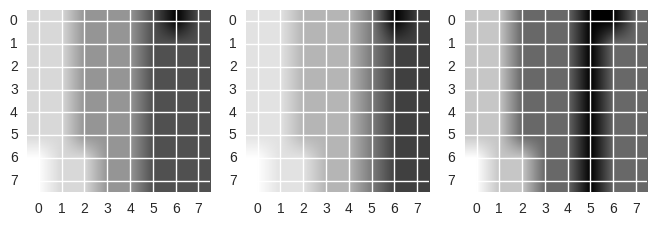

In [4]:
# Just to compare
part_of_the_img_0 = img[50:58, 50:58, 0] #using R
part_of_the_img_1 = img[50:58, 50:58, 1] #using G
part_of_the_img_2 = img[50:58, 50:58, 2] #using B
# Visualizing
fig = plt.figure()
ax0 = fig.add_subplot(131)
ax0.imshow(part_of_the_img_0)
ax1 = fig.add_subplot(132)
ax1.imshow(part_of_the_img_1)
ax2 = fig.add_subplot(133)
ax2.imshow(part_of_the_img_2)

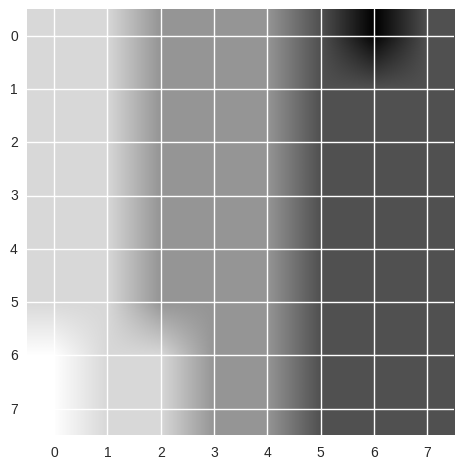

In [5]:
plt.imshow(part_of_the_img_0)
M = DCT_2d(part_of_the_img_0)

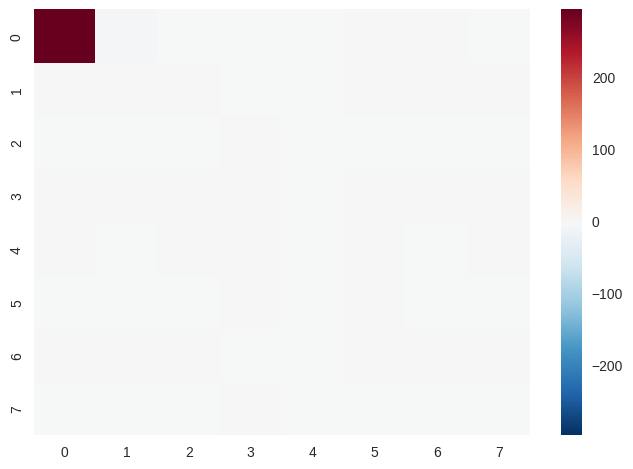

In [6]:
sea.heatmap(M)

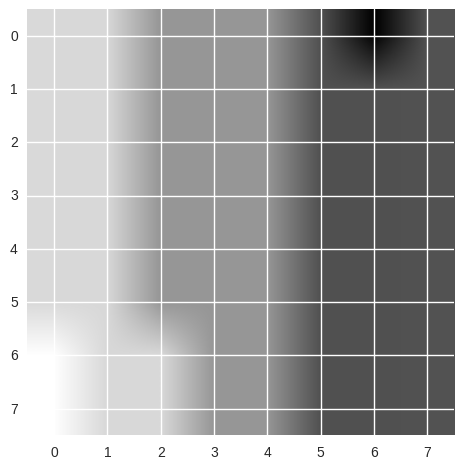

In [7]:
M1 = IDCT_2d(M)
plt.imshow(M1)

## Check the similarity of the initial matrix and the one we finally became

In [8]:
M1

array([[ 36.,  36.,  37.,  37.,  37.,  38.,  39.,  38.],
       [ 36.,  36.,  37.,  37.,  37.,  38.,  38.,  38.],
       [ 36.,  36.,  37.,  37.,  37.,  38.,  38.,  38.],
       [ 36.,  36.,  37.,  37.,  37.,  38.,  38.,  38.],
       [ 36.,  36.,  37.,  37.,  37.,  38.,  38.,  38.],
       [ 36.,  36.,  37.,  37.,  37.,  38.,  38.,  38.],
       [ 35.,  36.,  36.,  37.,  37.,  38.,  38.,  38.],
       [ 35.,  36.,  36.,  37.,  37.,  38.,  38.,  38.]])

In [9]:
part_of_the_img_0

array([[36, 36, 37, 37, 37, 38, 39, 38],
       [36, 36, 37, 37, 37, 38, 38, 38],
       [36, 36, 37, 37, 37, 38, 38, 38],
       [36, 36, 37, 37, 37, 38, 38, 38],
       [36, 36, 37, 37, 37, 38, 38, 38],
       [36, 36, 37, 37, 37, 38, 38, 38],
       [35, 36, 36, 37, 37, 38, 38, 38],
       [35, 36, 36, 37, 37, 38, 38, 38]], dtype=uint8)

In [10]:
M1 == part_of_the_img_0

array([[ True, False,  True,  True,  True, False, False,  True],
       [ True, False,  True,  True,  True, False, False,  True],
       [ True, False,  True,  True,  True, False, False,  True],
       [ True, False,  True,  True,  True, False, False,  True],
       [ True, False,  True,  True,  True, False, False,  True],
       [ True, False,  True,  True,  True, False, False,  True],
       [ True, False,  True,  True,  True, False, False,  True],
       [ True, False,  True,  True,  True, False, False,  True]], dtype=bool)

In [11]:
print M1[1][6]
print part_of_the_img_0[1][6]

38.0
38


Notice that the matrixes are similar, they differ only by type, so the functions work!

## Let me introduce our basic functions :)

In [12]:
TM = np.matrix('1 0 0 0 0 0 0 0\
              ; 0 0 0 0 0 0 0 0\
              ; 0 0 0 0 0 0 0 0\
              ; 0 0 0 0 0 0 0 0\
              ; 0 0 0 0 0 0 0 0\
              ; 0 0 0 0 0 0 0 0\
              ; 0 0 0 0 0 0 0 0\
              ; 0 0 0 0 0 0 0 0')

[[ 0.125  0.125  0.125  0.125  0.125  0.125  0.125  0.125]
 [ 0.125  0.125  0.125  0.125  0.125  0.125  0.125  0.125]
 [ 0.125  0.125  0.125  0.125  0.125  0.125  0.125  0.125]
 [ 0.125  0.125  0.125  0.125  0.125  0.125  0.125  0.125]
 [ 0.125  0.125  0.125  0.125  0.125  0.125  0.125  0.125]
 [ 0.125  0.125  0.125  0.125  0.125  0.125  0.125  0.125]
 [ 0.125  0.125  0.125  0.125  0.125  0.125  0.125  0.125]
 [ 0.125  0.125  0.125  0.125  0.125  0.125  0.125  0.125]]


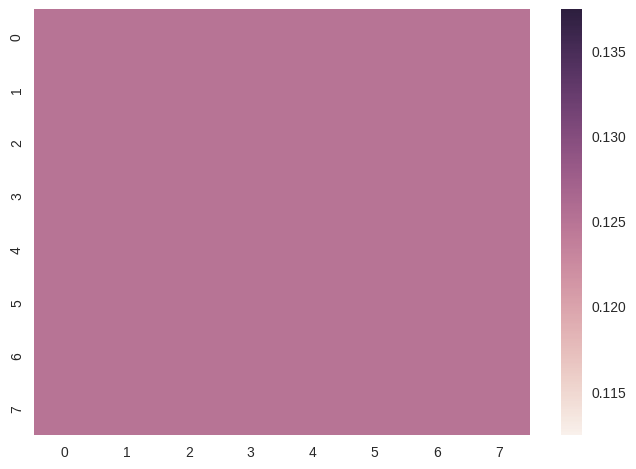

In [13]:
M1 = IDCT_2d(TM) #inverse DCT
sea.heatmap(M1) #as expected the function is constant
print M1

In [14]:
TM1 = np.matrix('0 1 0 0 0 0 0 0\
               ; 0 0 0 0 0 0 0 0\
               ; 0 0 0 0 0 0 0 0\
               ; 0 0 0 0 0 0 0 0\
               ; 0 0 0 0 0 0 0 0\
               ; 0 0 0 0 0 0 0 0\
               ; 0 0 0 0 0 0 0 0\
               ; 0 0 0 0 0 0 0 0')

[[ 0.17337998  0.14698445  0.09821187  0.03448742 -0.03448742 -0.09821187
  -0.14698445 -0.17337998]
 [ 0.17337998  0.14698445  0.09821187  0.03448742 -0.03448742 -0.09821187
  -0.14698445 -0.17337998]
 [ 0.17337998  0.14698445  0.09821187  0.03448742 -0.03448742 -0.09821187
  -0.14698445 -0.17337998]
 [ 0.17337998  0.14698445  0.09821187  0.03448742 -0.03448742 -0.09821187
  -0.14698445 -0.17337998]
 [ 0.17337998  0.14698445  0.09821187  0.03448742 -0.03448742 -0.09821187
  -0.14698445 -0.17337998]
 [ 0.17337998  0.14698445  0.09821187  0.03448742 -0.03448742 -0.09821187
  -0.14698445 -0.17337998]
 [ 0.17337998  0.14698445  0.09821187  0.03448742 -0.03448742 -0.09821187
  -0.14698445 -0.17337998]
 [ 0.17337998  0.14698445  0.09821187  0.03448742 -0.03448742 -0.09821187
  -0.14698445 -0.17337998]]


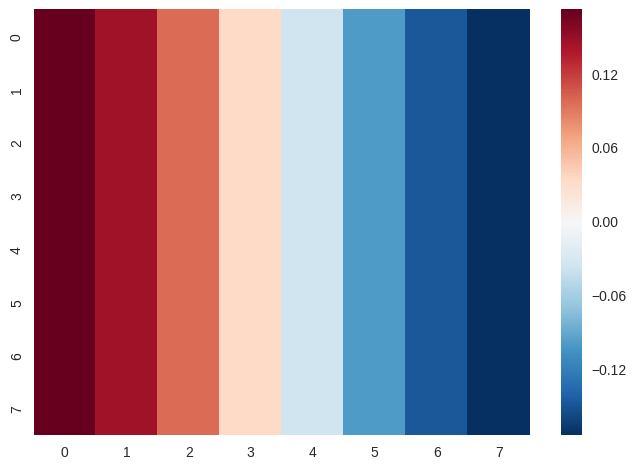

In [15]:
M2 = IDCT_2d(TM1)
sea.heatmap(M2) #the function is cos(...) 
print M2

In [16]:
TM1[0,1]

1

And so on we can become the bases functions

## Let's try to affect the [0,1] elem of DCT 2d

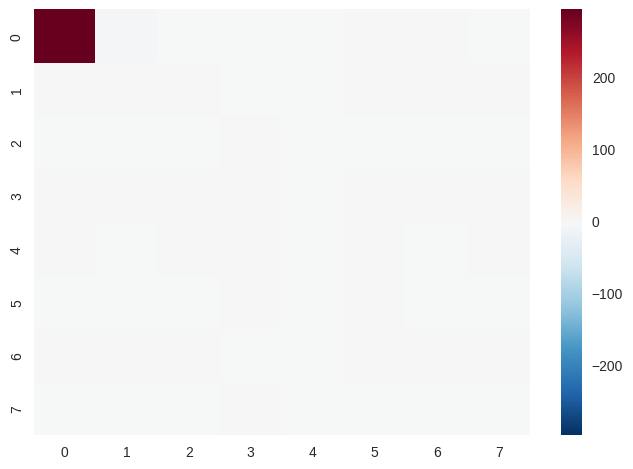

In [17]:
#plt.imshow(part_of_the_img_0)
T = DCT_2d(part_of_the_img_0)
sea.heatmap(T)

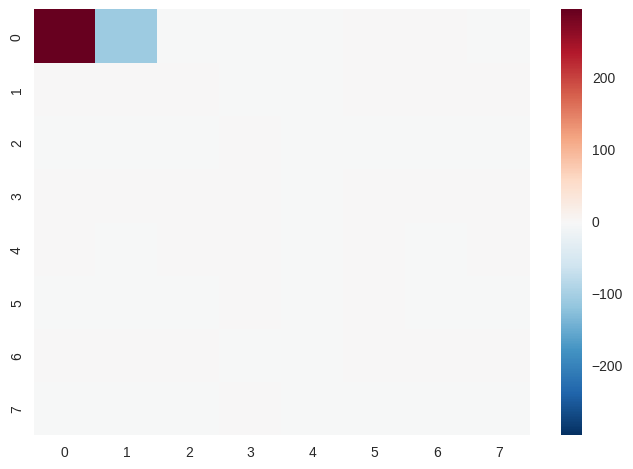

In [18]:
T = DCT_2d(part_of_the_img_0-100*M2) #M2 - THE BASIC FUNCTION OF [0,1]
sea.heatmap(T)

### Hurrray we changed the [0,1] coeff of DCT !!!

## Now have a look at initial and changed pictures 

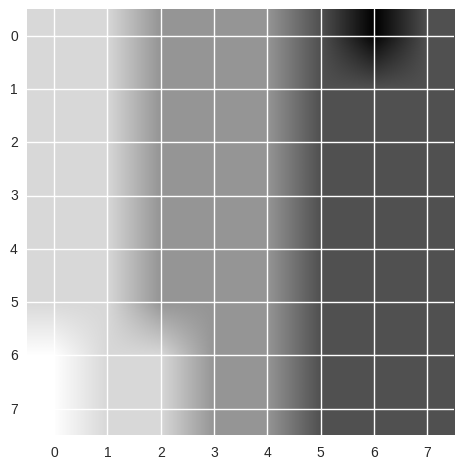

In [19]:
plt.imshow(part_of_the_img_0) # original

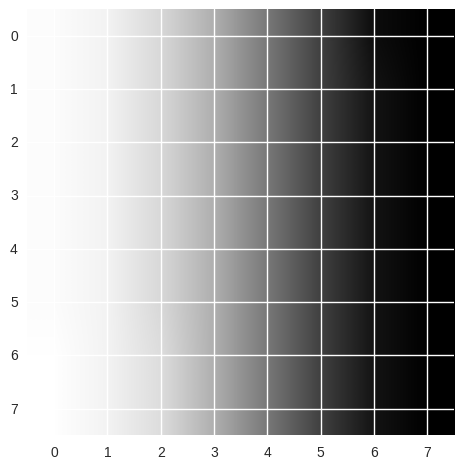

In [20]:
plt.imshow(part_of_the_img_0-100*M2) #transformed

The numbers in pixels change smoothly, this gives a hope that our changes will not be noticed by histograms!

## Experimentation with matrix modifiers

Original block:


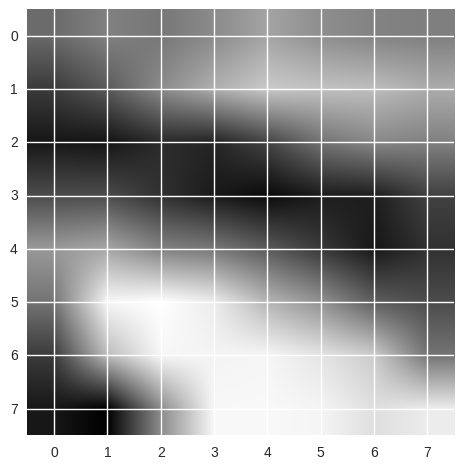

TM0:


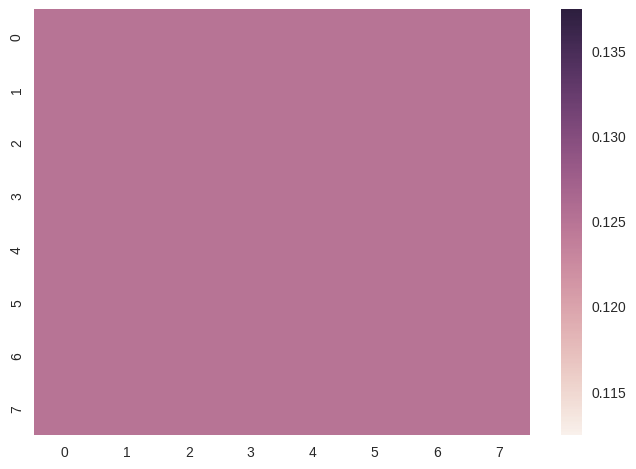

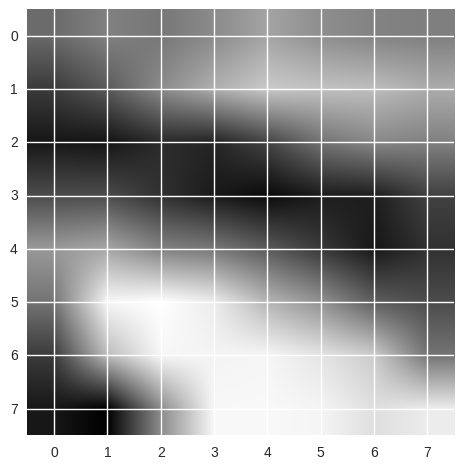

TM1:


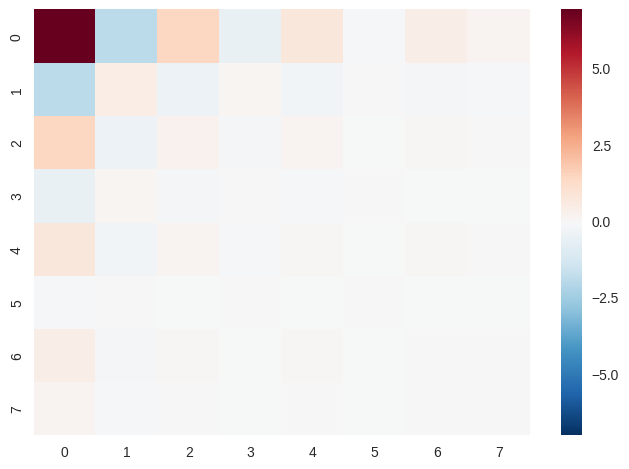

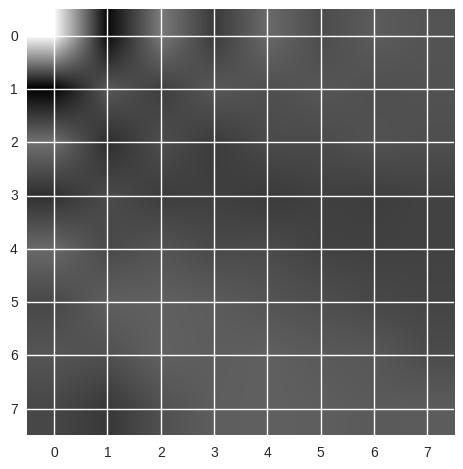

TM2:


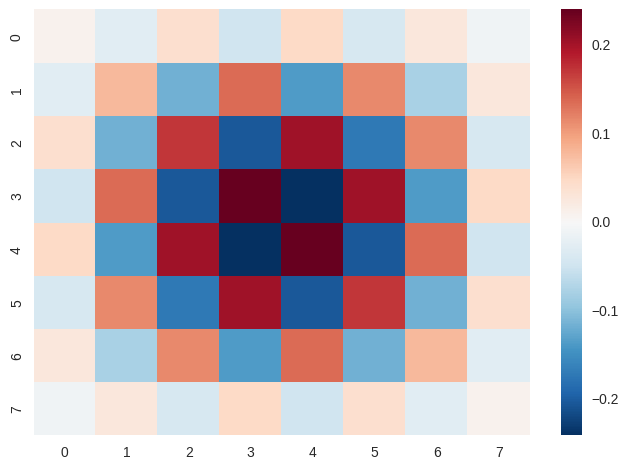

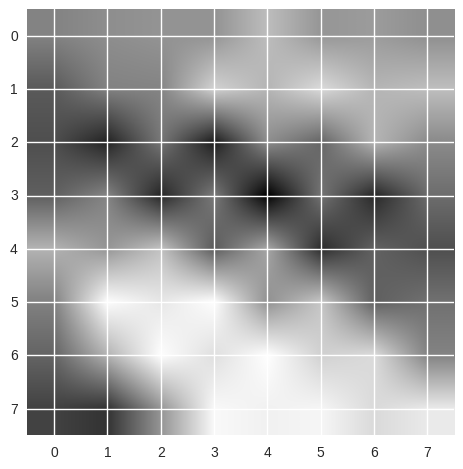

TM3:


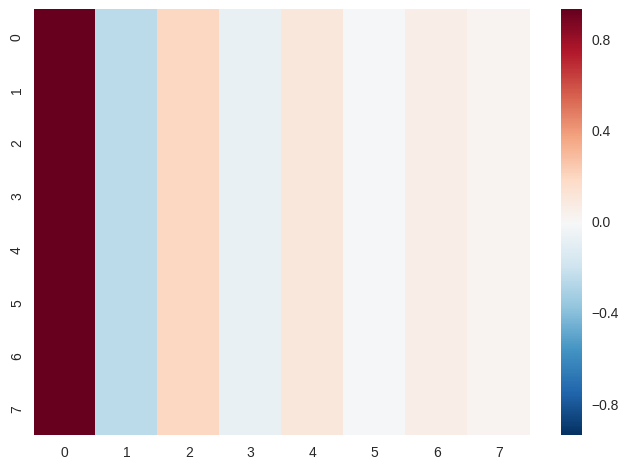

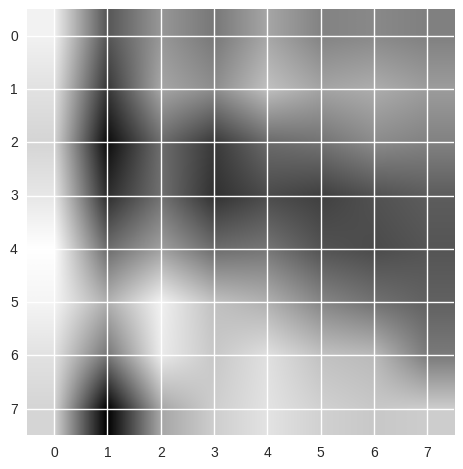

TM4:


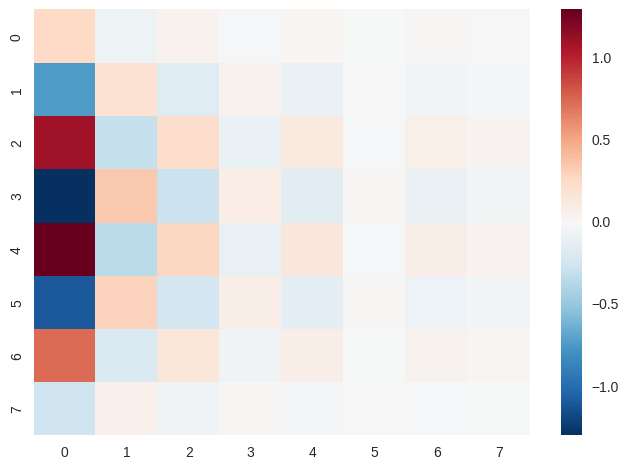

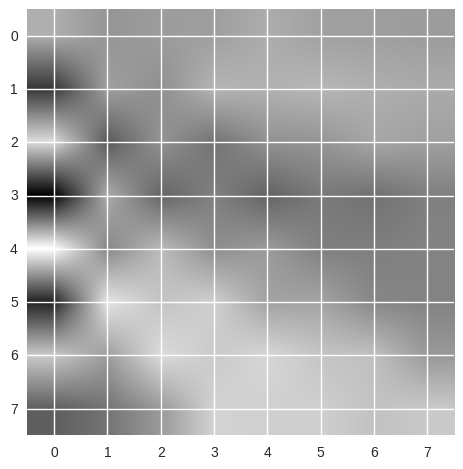

TM5:


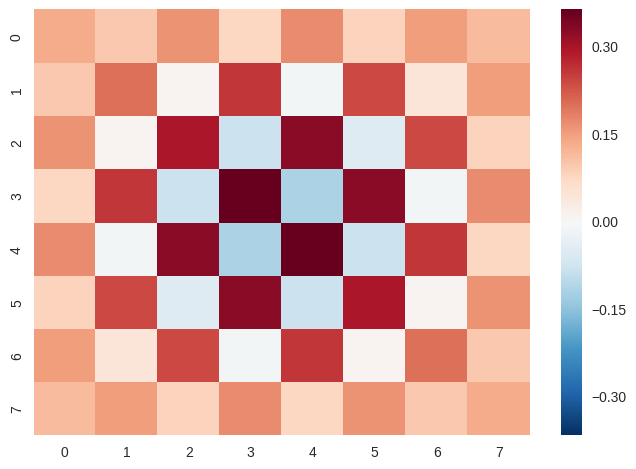

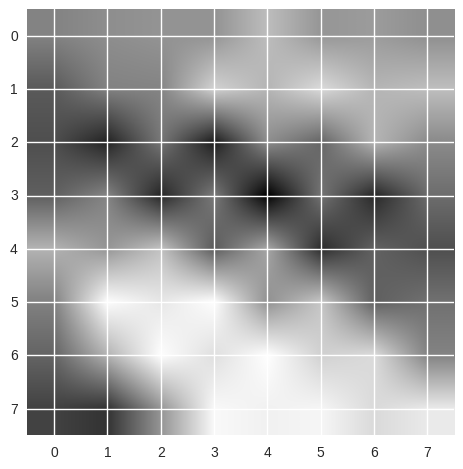

TM6:


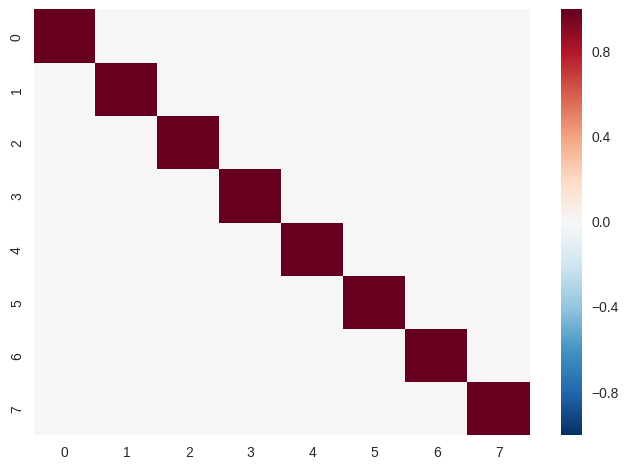

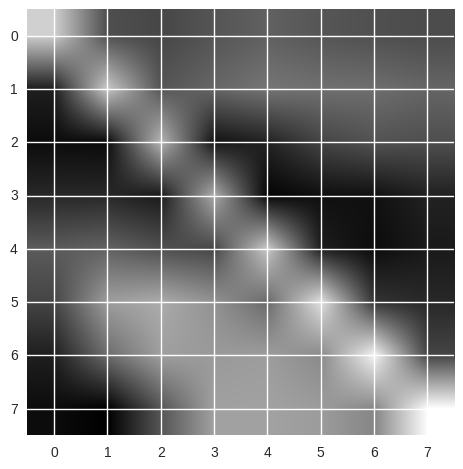

TM7:


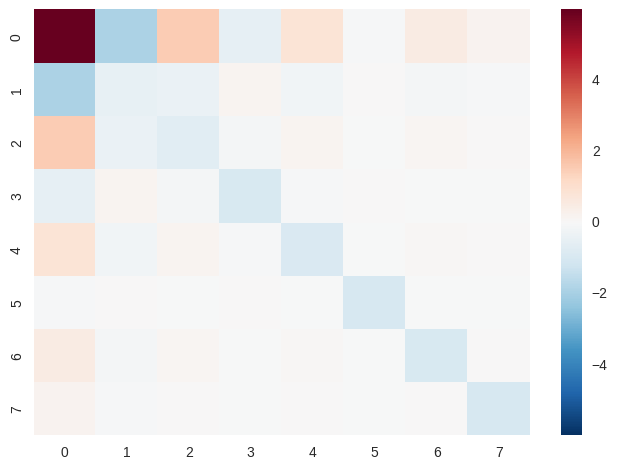

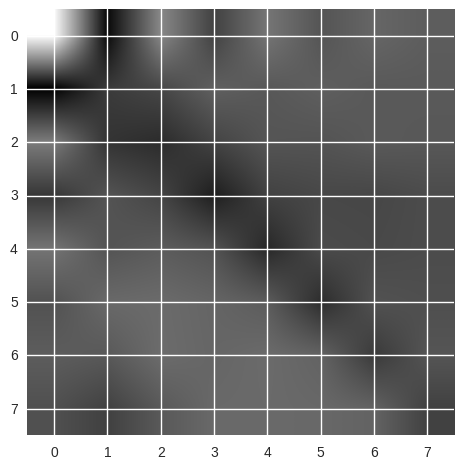

In [21]:
testblock = img[250:258, 150:158, 0]

def testmodifier(modifier):
    scale = 100
    addend = IDCT_2d(modifier)
    sea.heatmap(addend)
    plt.show()
    modifiedblock = testblock - scale*addend
    plt.imshow(modifiedblock)
    plt.show()
    
tm0 = np.matrix('1 0 0 0 0 0 0 0\
               ; 0 0 0 0 0 0 0 0\
               ; 0 0 0 0 0 0 0 0\
               ; 0 0 0 0 0 0 0 0\
               ; 0 0 0 0 0 0 0 0\
               ; 0 0 0 0 0 0 0 0\
               ; 0 0 0 0 0 0 0 0\
               ; 0 0 0 0 0 0 0 0')

tm1 = np.matrix('1 1 1 1 1 1 1 1\
               ; 1 1 1 1 1 1 1 1\
               ; 1 1 1 1 1 1 1 1\
               ; 1 1 1 1 1 1 1 1\
               ; 1 1 1 1 1 1 1 1\
               ; 1 1 1 1 1 1 1 1\
               ; 1 1 1 1 1 1 1 1\
               ; 1 1 1 1 1 1 1 1')

tm2 = np.matrix('0 0 0 0 0 0 0 0\
               ; 0 0 0 0 0 0 0 0\
               ; 0 0 0 0 0 0 0 0\
               ; 0 0 0 0 0 0 0 0\
               ; 0 0 0 0 0 0 0 0\
               ; 0 0 0 0 0 0 0 0\
               ; 0 0 0 0 0 0 0 0\
               ; 0 0 0 0 0 0 0 1')

tm3 = np.matrix('1 1 1 1 1 1 1 1\
               ; 0 0 0 0 0 0 0 0\
               ; 0 0 0 0 0 0 0 0\
               ; 0 0 0 0 0 0 0 0\
               ; 0 0 0 0 0 0 0 0\
               ; 0 0 0 0 0 0 0 0\
               ; 0 0 0 0 0 0 0 0\
               ; 0 0 0 0 0 0 0 0')

tm4 = np.matrix('0 0 0 0 0 0 0 0\
               ; 0 0 0 0 0 0 0 0\
               ; 0 0 0 0 0 0 0 0\
               ; 0 0 0 0 0 0 0 0\
               ; 0 0 0 0 0 0 0 0\
               ; 0 0 0 0 0 0 0 0\
               ; 0 0 0 0 0 0 0 0\
               ; 1 1 1 1 1 1 1 1')

tm5 = np.matrix('1 0 0 0 0 0 0 0\
               ; 0 0 0 0 0 0 0 0\
               ; 0 0 0 0 0 0 0 0\
               ; 0 0 0 0 0 0 0 0\
               ; 0 0 0 0 0 0 0 0\
               ; 0 0 0 0 0 0 0 0\
               ; 0 0 0 0 0 0 0 0\
               ; 0 0 0 0 0 0 0 1')

tm6 = np.matrix('1 0 0 0 0 0 0 0\
               ; 0 1 0 0 0 0 0 0\
               ; 0 0 1 0 0 0 0 0\
               ; 0 0 0 1 0 0 0 0\
               ; 0 0 0 0 1 0 0 0\
               ; 0 0 0 0 0 1 0 0\
               ; 0 0 0 0 0 0 1 0\
               ; 0 0 0 0 0 0 0 1')

tm7 = np.matrix('0 1 1 1 1 1 1 1\
               ; 1 0 1 1 1 1 1 1\
               ; 1 1 0 1 1 1 1 1\
               ; 1 1 1 0 1 1 1 1\
               ; 1 1 1 1 0 1 1 1\
               ; 1 1 1 1 1 0 1 1\
               ; 1 1 1 1 1 1 0 1\
               ; 1 1 1 1 1 1 1 0')

print 'Original block:'
plt.imshow(testblock)
plt.show()

print 'TM0:'
testmodifier(tm0)
print 'TM1:'
testmodifier(tm1)
print 'TM2:'
testmodifier(tm2)
print 'TM3:'
testmodifier(tm3)
print 'TM4:'
testmodifier(tm4)
print 'TM5:'
testmodifier(tm5)
print 'TM6:'
testmodifier(tm6)
print 'TM7:'
testmodifier(tm7)